# Logistic Regression :

                                                              - Mohanakumar Thangaraju

# Abstract:

Subjects receiving the same vaccine often show different levels of immune responses
and some may even present adverse side effects to the vaccine. Systems vaccinology can
combine omics data and machine learning techniques to obtain highly predictive
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine
learning methods are already available to researchers with no background in
bioinformatics.

# Problem Statement:

Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic
Regression.

# Importing Library : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset


In [2]:
thedata=pd.read_csv("h1n1_vaccine_prediction.csv")

# Checking for null values :

In [3]:
thedata.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Removing Null values

In [4]:
thedata=thedata.drop('has_health_insur',axis=1)

#  --------The variable "has_health_insur" contains so many null values . so we are just dropping the entire column

In [5]:
thedata.isna().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [6]:
the_data=thedata.dropna()

In [7]:
the_data.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

# Label Encoder 


   To change the string classified columns into numerical

In [8]:
from sklearn.preprocessing import LabelEncoder

LB = LabelEncoder()

In [9]:
the_data['age_bracket']=LB.fit_transform(the_data.age_bracket)
the_data['qualification']=LB.fit_transform(the_data.qualification)
the_data['race']=LB.fit_transform(the_data.race)
the_data['sex']=LB.fit_transform(the_data.sex)
the_data['income_level']=LB.fit_transform(the_data.income_level)
the_data['marital_status']=LB.fit_transform(the_data.marital_status)
the_data['housing_status']=LB.fit_transform(the_data.housing_status)
the_data['employment']=LB.fit_transform(the_data.employment)
the_data['census_msa']=LB.fit_transform(the_data.census_msa)

<ipython-input-9-d8c40fa9e5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_data['age_bracket']=LB.fit_transform(the_data.age_bracket)
<ipython-input-9-d8c40fa9e5d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_data['qualification']=LB.fit_transform(the_data.qualification)
<ipython-input-9-d8c40fa9e5d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [10]:
the_data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,1,1,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0


# visualization

In [11]:
the_data_corr= the_data.corr()

In [12]:
the_data_corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.015039,0.003837,-0.006505,0.008889,-0.008745,0.013715,0.004926,0.010465,0.004628,...,-0.003081,0.007151,-0.000447,-0.007461,-0.004717,-0.007546,0.004217,0.002571,-0.002546,-0.002564
h1n1_worry,0.015039,1.000000,0.059023,0.090782,0.235204,0.162740,0.293807,0.264525,0.252513,0.249776,...,-0.138008,-0.140634,0.051541,-0.037674,0.001543,0.063658,0.001952,-0.016045,0.048792,0.134136
h1n1_awareness,0.003837,0.059023,1.000000,-0.007402,0.071382,0.037583,0.084454,-0.044571,-0.069281,0.085656,...,0.159728,-0.090490,-0.048729,-0.119238,-0.129561,-0.130574,-0.059204,0.012606,0.053608,0.125878
antiviral_medication,-0.006505,0.090782,-0.007402,1.000000,0.045012,0.145122,0.059663,0.106117,0.124120,0.064138,...,-0.119113,-0.012273,0.073540,0.019969,0.072057,0.009879,0.016787,0.041534,0.080335,0.036202
contact_avoidance,0.008889,0.235204,0.071382,0.045012,1.000000,0.061104,0.336035,0.227655,0.223418,0.328064,...,-0.003287,-0.124459,0.005424,-0.056189,-0.033846,0.026455,-0.023196,0.013944,0.039898,0.044053
bought_face_mask,-0.008745,0.162740,0.037583,0.145122,0.061104,1.000000,0.077821,0.181502,0.167205,0.107283,...,-0.088761,-0.048235,0.049560,0.005343,0.053974,0.036373,-0.004213,0.016216,0.005850,0.075303
wash_hands_frequently,0.013715,0.293807,0.084454,0.059663,0.336035,0.077821,1.000000,0.193549,0.191407,0.365312,...,-0.067637,-0.168138,0.019699,-0.048730,-0.022973,0.003264,-0.011314,0.006272,0.041377,0.075384
avoid_large_gatherings,0.004926,0.264525,-0.044571,0.106117,0.227655,0.181502,0.193549,1.000000,0.587728,0.244823,...,-0.122248,-0.056706,0.023563,0.025693,0.055086,0.145750,0.047392,-0.032031,-0.010426,0.020589
reduced_outside_home_cont,0.010465,0.252513,-0.069281,0.124120,0.223418,0.167205,0.191407,0.587728,1.000000,0.262231,...,-0.139519,-0.044241,0.049328,0.029166,0.072339,0.156708,0.033533,-0.027936,-0.010334,0.017272
avoid_touch_face,0.004628,0.249776,0.085656,0.064138,0.328064,0.107283,0.365312,0.244823,0.262231,1.000000,...,-0.059859,-0.178853,-0.001153,-0.038495,-0.021259,0.028547,0.008451,-0.002907,0.020962,0.071344


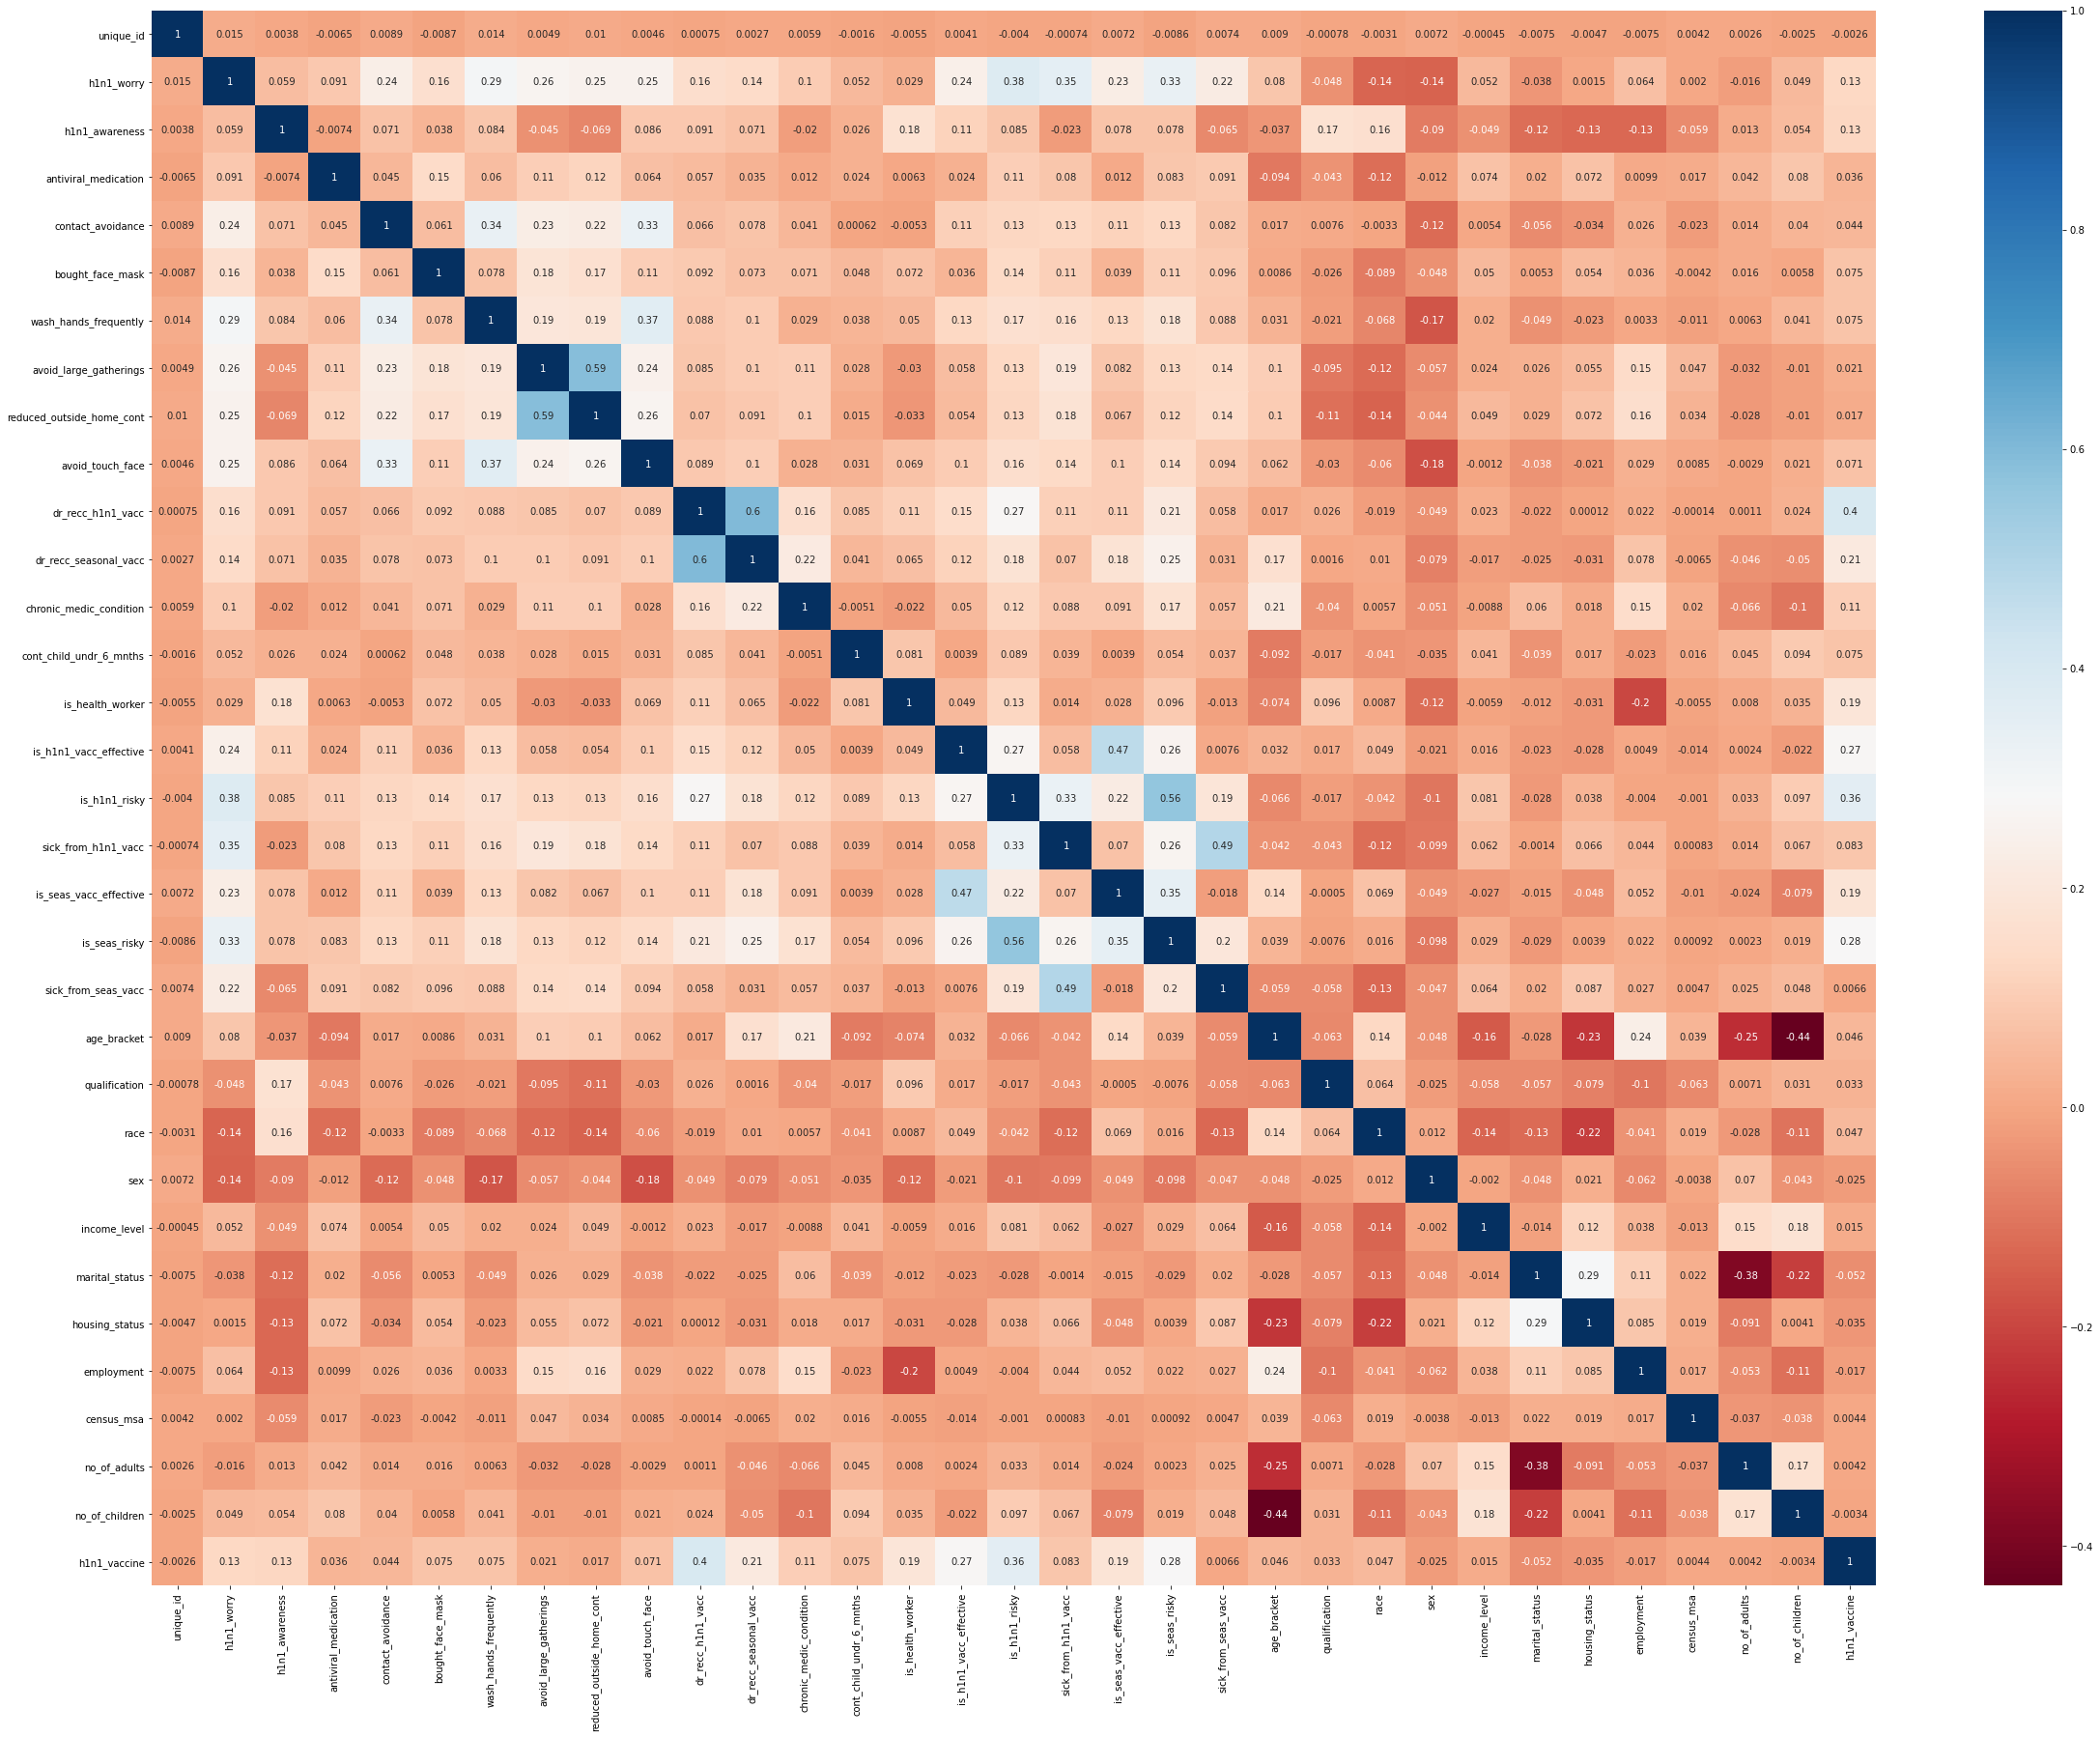

In [13]:
fig=plt.figure(figsize=(40,30))
sns.heatmap(the_data_corr,annot=True,cmap='RdBu')

Text(0.5, 1.0, 'Income andExperience')

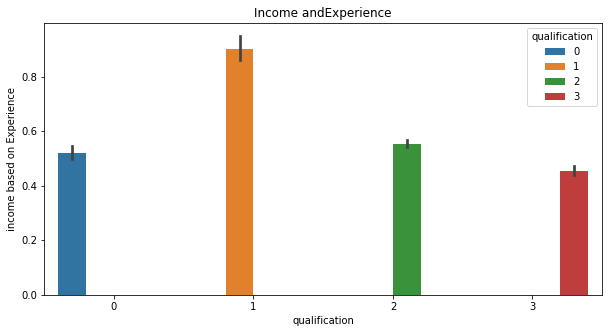

In [14]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x=the_data['qualification'],y=the_data['income_level'],hue=the_data['qualification'])
plt.ylabel('income based on Experience')
plt.title('Income andExperience')


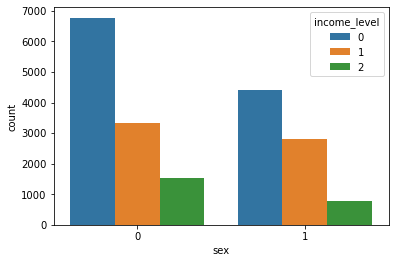

In [15]:
sns.countplot('sex',data=the_data,hue='income_level')

# Descriptive Statistics :

In [16]:
the_data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,...,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,13342.924804,1.615518,1.302566,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,...,2.585582,0.407494,0.547551,0.451787,0.237349,0.492872,0.836218,0.903218,0.551064,0.229814
std,7722.791039,0.888246,0.596258,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,...,0.908206,0.491381,0.694083,0.497683,0.425468,0.604343,0.825924,0.746290,0.938224,0.420724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6668.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13320.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,20048.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000


# Extracting X,Y variables

In [17]:
x_ind=the_data.drop(['unique_id','h1n1_vaccine'],axis=1)

In [18]:
y_dep=the_data.h1n1_vaccine

# Model building - Logistic Regression :

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

In [21]:
import statsmodels.api as sm

In [22]:
model=sm.Logit(y_train,x_train)

In [23]:
fit_data=model.fit()

Optimization terminated successfully.
         Current function value: 0.433292
         Iterations 6


In [24]:
fit_data.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.194     
Dependent Variable:    h1n1_vaccine        AIC:                 13678.6214
Date:                  2021-02-19 17:27    BIC:                 13916.1510
No. Observations:      15713               Log-Likelihood:      -6808.3   
Df Model:              30                  LL-Null:             -8442.1   
Df Residuals:          15682               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
h1n1_worry                -0.1080   0.0297  -3.6403 0.0003 -0.1662 -0.0499
h1n1_awareness            -0.1002   0.0382  -2.6221 0.0087 -0.1751 -0.0253
antiviral_medication      -0.0447   0.1006  -0.4442 0.6569 -0.2417  0.1524
contact_avoidance         -0.1432   0.0544  -2.6329 0.0085 -0.2499 -0.0366
bought_face_mask           0.2224   0.0839   2.6505 0.0080  0.0579  0.3868
wash_hands_frequently     -0.3719   0.0648  -5.7369 0.0000 -0.4990 -0.2448
avoid_large_gatherings    -0.1619   0.0580  -2.7912 0.0053 -0.2756 -0.0482
reduced_outside_home_cont -0.0602   0.0593  -1.0161 0.3096 -0.1763  0.0559
avoid_touch_face          -0.1199   0.0529  -2.2678 0.0233 -0.2235 -0.0163
dr_recc_h1n1_vacc          2.0410   0.0651  31.3501 0.0000  1.9134  2.1685
dr_recc_seasonal_vacc     -0.5688   0.0640  -8.8907 0.0000 -0.6941 -0.4434
chronic_medic_condition    0.1862   0.0496   3.7544 0.0002  0.0890  0.2833
cont_child_undr_6_mnths    0.1373   0.0748   1.8346 0.0666 -0.0094  0.2840
is_health_worker           0.8033   0.0631  12.7333 0.0000  0.6796  0.9269
is_h1n1_vacc_effective     0.2146   0.0258   8.3187 0.0000  0.1641  0.2652
is_h1n1_risky              0.3952   0.0210  18.8076 0.0000  0.3540  0.4364
sick_from_h1n1_vacc       -0.0830   0.0196  -4.2314 0.0000 -0.1214 -0.0445
is_seas_vacc_effective    -0.1269   0.0242  -5.2482 0.0000 -0.1743 -0.0795
is_seas_risky              0.1951   0.0200   9.7353 0.0000  0.1558  0.2344
sick_from_seas_vacc       -0.1887   0.0193  -9.7618 0.0000 -0.2266 -0.1508
age_bracket               -0.0825   0.0186  -4.4348 0.0000 -0.1189 -0.0460
qualification             -0.1445   0.0202  -7.1405 0.0000 -0.1842 -0.1048
race                      -0.2610   0.0232 -11.2609 0.0000 -0.3064 -0.2155
sex                       -0.1767   0.0450  -3.9261 0.0001 -0.2650 -0.0885
income_level              -0.0697   0.0329  -2.1206 0.0340 -0.1341 -0.0053
marital_status            -0.7195   0.0499 -14.4053 0.0000 -0.8174 -0.6216
housing_status            -0.3757   0.0575  -6.5366 0.0000 -0.4883 -0.2630
employment                -0.0956   0.0401  -2.3812 0.0173 -0.1742 -0.0169
census_msa                -0.0964   0.0261  -3.6935 0.0002 -0.1475 -0.0452
no_of_adults              -0.3597   0.0339 -10.6226 0.0000 -0.4260 -0.2933
no_of_children            -0.2565   0.0272  -9.4237 0.0000 -0.3098 -0.2031
==========================================================================

"""

In [25]:
#x_train.drop('antiviral_medication',axis=1,inplace=True)

#model=sm.Logit(y_train,x_train)
#p_value=model.fit()
#p_value.summary2()

In [26]:
#x_train.drop('reduced_outside_home_cont',axis=1,inplace=True)

#model=sm.Logit(y_train,x_train)
#p_value=model.fit()
#p_value.summary2()

In [27]:
#x_train.drop('cont_child_undr_6_mnths',axis=1,inplace=True)

#model=sm.Logit(y_train,x_train)
#p_value=model.fit()
#p_value.summary2()

# there by 'antiviral_medication','reduced_outside_home_cont' seems to be dropped inorder to make the model more accruate

In [28]:
x_train=x_train.drop(['antiviral_medication','reduced_outside_home_cont'],axis=1)

In [29]:
x_train

,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
6644,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2,3,1,0,0,1,1,2,1.0,0.0
24027,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,0,0,0,1,1,1.0,0.0
15723,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,2,0,1,0,0,0,0,1.0,0.0
26625,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,3,1,0,1,0,1,1,0.0,0.0
1644,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,1,2,1,1,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,3,0,2,1,1,0,2,1.0,2.0
25681,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,3,0,0,1,0,0,2,0.0,0.0
16030,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,3,0,0,0,0,1,1,1.0,2.0
9006,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3,3,1,0,0,0,1,1,0.0,0.0


In [30]:
x_test=x_test.drop(['antiviral_medication','reduced_outside_home_cont'],axis=1)

In [31]:
x_test

,h1n1_worry,h1n1_awareness,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
16383,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2,3,1,2,1,1,0,2,0.0,0.0
2719,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,0,1,0,0,1,1.0,0.0
19595,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,3,0,2,1,1,1,0,0.0,0.0
26069,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,0,0,1,0,1,1,1.0,0.0
19837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24919,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,0,1,1,0,1,0,1,1.0,2.0
5601,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2,3,0,0,0,0,0,2,1.0,0.0
13469,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3,3,0,0,1,0,1,2,0.0,0.0
23440,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2,3,1,1,0,0,0,0,1.0,2.0


In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
my_fit=model.fit(x_train,y_train)

In [33]:
y_pred=my_fit.predict(x_test)

# Y_pred

In [34]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2824,  179],
       [ 459,  467]], dtype=int64)

In [36]:
Accuracy = ((2824+467)/(2824+179+459+467))*100

In [37]:
Accuracy

83.7617714431153

# thereby ,  finally the model seems to be 83.76 % accurate using this logistic regression 

In [38]:
# check model score from x_train,y_train,x_test,y_test

In [39]:
model.score(x_train,y_train)

0.8288678164577101

In [40]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)

In [41]:
acc

0.837617714431153

# ROC Curve

In [42]:
# roc curve : A receiver operating characteristic curve
# is a graphical plot that illustrates the diagonostic ability of a binary classifier system
# which bring the threshold point 

y_pred_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_prob)

In [43]:
y_pred_prob

array([0.25845032, 0.16457057, 0.03378137, ..., 0.72371677, 0.48457316,
       0.06273478])

In [44]:
roc_acc=metrics.roc_auc_score(y_test,y_pred_prob)

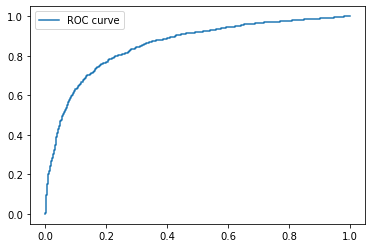

In [45]:
plt.plot(fpr,tpr,label="ROC curve")
plt.legend()

In [46]:
update_roc=LogisticRegression(class_weight="balanced")
update_roc.fit(x_train,y_train)
threshold=0.79

In [47]:
apply_roc_thr=np.where(update_roc.predict_proba(x_test)[:,1]>threshold,1,0)

apply_roc_thr

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
pd.DataFrame(data=[metrics.accuracy_score(y_test,apply_roc_thr)],index=["Acc"])

,0
Acc,0.836091


In [49]:
metrics.accuracy_score(y_test,apply_roc_thr)

0.8360906082972767

# the Accuracy score obtained by using ROC curve is 83.6 % 